In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv('ex2data1.txt',header=None)


In [36]:
def getX_y(df):
    X= df.iloc[:,:-1].values
    y= df.iloc[:,-1:].values
    return X,y

In [37]:
X,y = getX_y(df)

In [38]:
def plotData(X,y):
    pos = np.where(y==1)[0]
    neg = np.where(y==0)[0]
    plt.figure(figsize=(10,6))
    plt.plot(X[pos,0],X[pos,1],'b+',markersize=8)
    plt.plot(X[neg,0],X[neg,1],'yo',markersize=8)
    plt.grid(True) #Always plot.grid true!
    plt.ylabel('Exam2')
    plt.xlabel('Exam1')

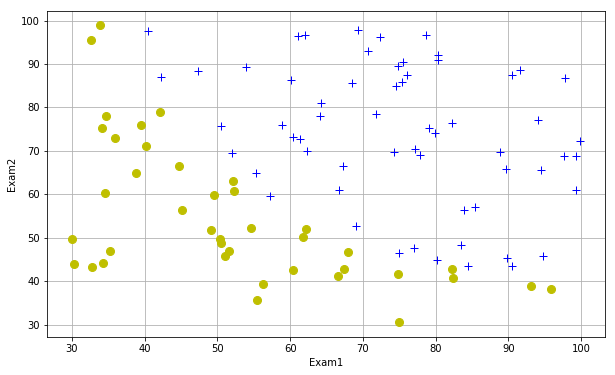

In [39]:
plotData(X,y)

In [40]:
X = np.insert(X,0,1,axis=1)

In [41]:
m,n = X.shape

In [42]:
theta= np.zeros((n,1))


In [43]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [44]:
def costFunction(theta, X, y):
    m= y.size
    J=0
    grad = np.zeros(theta.size) 
    p1= -1*np.multiply(y,(np.log(sigmoid(np.matmul(X,theta)))))
    p2= np.multiply((1-y),(np.log(1-sigmoid(np.matmul(X,theta)))))
    J= np.sum(p1-p2)/m
#     grad= (X' * (sigmoid(X * theta) - y)) * (1/m);
    grad= (np.matmul(np.transpose(X),(sigmoid(np.matmul(X,theta))-y)))*(1/m)
    return J, grad

In [45]:
cost , grad= costFunction(theta, X, y)


In [46]:
print('Cost at initial theta (zeros): ', cost);
print('Expected cost (approx): 0.693');
print('Gradient at initial theta (zeros):');
print(grad);
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n');


Cost at initial theta (zeros):  0.6931471805599453
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [47]:
test_theta = np.array([[-24], [0.2], [0.2]]);

In [48]:
cost, grad = costFunction(test_theta, X, y)

In [49]:
print('Cost at initial theta (zeros): ', cost);
print('Expected cost (approx): 0.218');
print('Gradient at initial theta (zeros):');
print(grad);
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n');

Cost at initial theta (zeros):  0.21833019382659796
Expected cost (approx): 0.218
Gradient at initial theta (zeros):
[[0.04290299]
 [2.56623412]
 [2.64679737]]
Expected gradients (approx):
 0.043
 2.566
 2.647



In [50]:
def plotDecisionBoundary(X,y,theta):
    plotData(X[:,[1,2]], y)
    plot_x= np.array([np.amin(X[:,1])-2, np.amax(X[:,1])+2])
    plot_y = np.multiply((np.divide(-1,theta[2])),(np.multiply(theta[1],plot_x )+ theta[0]))
    line=plt.plot(plot_x, plot_y)
                        

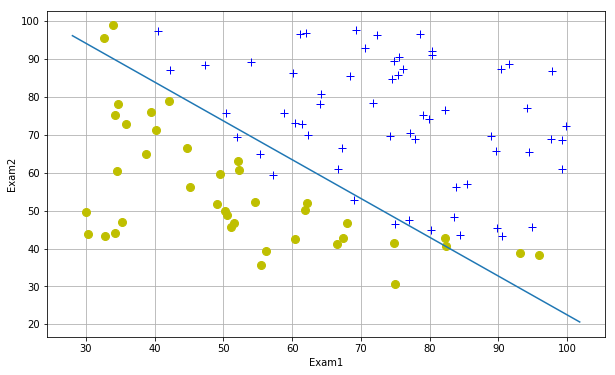

In [63]:
theta=np.array(([-24.932946],[0.204407], [0.199618]))
plotDecisionBoundary(X,y,theta)

In [52]:
prob = sigmoid(np.matmul(np.array([1, 45 ,85]) , theta))

In [53]:
print('For a student with scores 45 and 85, we predict an admission probability of', prob);
print('Expected value: 0.775 +/- 0.002');

For a student with scores 45 and 85, we predict an admission probability of 0.7743255642686264
Expected value: 0.775 +/- 0.002


In [65]:
def predict(theta, X):
    m=X.size
    p=sigmoid(np.matmul(X , theta))
    p[p >=.5]=1
    p[p <.5]=0
    return p

In [66]:
p = predict(theta, X)

In [68]:
print('Train Accuracy: ', np.mean((p[:,0]==y[:,0]))*100)
print('Expected accuracy (approx): 89.0')

Train Accuracy:  89.0
Expected accuracy (approx): 89.0
